## Challenge Set 4
Topic: Linear Regression and Train/Test Split challenges  
Date: 07/19/2016  
Name: Kevin Cole  

In [2]:
import pandas as pd
%matplotlib inline
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm

In [3]:
# B0 + B1*log(x) + epsilon
# Create randomly distributed error
x = np.random.rand(100)*100
mu, sigma = 0, 1
epsilon = np.random.normal(mu, sigma, 100)
B0 = 22
B1 = 1.2
y = [[B0 + B1*np.log(x[i]) + epsilon[i]] for i in range(len(x))]

df = pd.DataFrame(data = y)
df.columns = ['y']
df['x'] = [i for i in x]
df['epsilon'] = [i for i in epsilon]

In [4]:
df.head(2)

,y,x,epsilon
0,26.505738,96.514094,-0.977889
1,24.713805,27.634364,-1.269067


In [5]:
22 + 1.2*np.log(52.986962) + (-1.720833)

25.043222059946991

In [6]:
df['quad_x'] = [i**2 for i in x]
df['log_x'] = np.log(x)

In [7]:
df.head(2)

,y,x,epsilon,quad_x,log_x
0,26.505738,96.514094,-0.977889,9314.970273,4.569689
1,24.713805,27.634364,-1.269067,763.658093,3.319060


In [8]:
y, X = dmatrices('y ~ quad_x', data=df, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
pred = results.predict(X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     78.21
Date:                Thu, 21 Jul 2016   Prob (F-statistic):           3.90e-14
Time:                        11:46:49   Log-Likelihood:                -166.29
No. Observations:                 100   AIC:                             336.6
Df Residuals:                      98   BIC:                             341.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     25.0305      0.196    127.828      0.000        24.642    25.419
quad_x         0.0003   3.89e-05      8.843      0.000         0.000     0.000
==============================================================================
Omnibus:                       39.742   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.194
Skew:                          -1.368   Prob(JB):                     3.56e-26
Kurtosis:                       7.543   Cond. No.                     7.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
y, X = dmatrices('y ~ log_x', data=df, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
pred = results.predict(X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     295.9
Date:                Thu, 21 Jul 2016   Prob (F-statistic):           2.32e-31
Time:                        11:46:51   Log-Likelihood:                -126.07
No. Observations:                 100   AIC:                             256.1
Df Residuals:                      98   BIC:                             261.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     21.4868      0.295     72.910      0.000        20.902    22.072
log_x          1.3425      0.078     17.200      0.000         1.188     1.497
==============================================================================
Omnibus:                        0.966   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.945
Skew:                           0.056   Prob(JB):                        0.623
Kurtosis:                       2.537   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

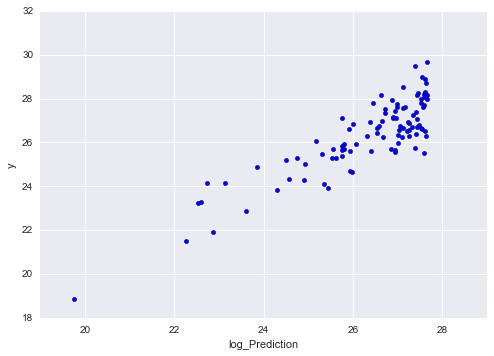

In [10]:
plt.scatter(pred, y)
plt.xlabel('log_Prediction')
plt.ylabel('y')
plt.show()

## Challenge 2

In [11]:
#B0 + B1*x + B2*x^2 + epsilon

x = np.random.rand(100)*100
mu, sigma = 0, 10
epsilon = np.random.normal(mu, sigma, 100)
B0 = 22
B1 = 1.2
B2 = 0.6
y = [[B0 + B1*x[i] + B2*(x[i]**2) + epsilon[i]] for i in range(len(x))]

df = pd.DataFrame(data = y)
df.columns = ['y']
df['x'] = [i for i in x]
df['epsilon'] = [i for i in epsilon]

In [69]:
df.head(2)

,y,x,epsilon
0,121.794152,11.936263,-0.013982
1,4395.322023,84.550635,-17.424690


In [13]:
#Split the data into a training and test set
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

y, X = dmatrices('y ~ x', data=df, return_type='dataframe')

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

#Fit a model to your training set.
model = LinearRegression().fit(X_train, y_train)

In [14]:
#Calculate mean squared error on your training set.
from sklearn import metrics

print(metrics.mean_squared_error(y_train,model.predict(X_train)))

#Then calculate it on your test set.
print(metrics.mean_squared_error(y_test,model.predict(X_test)))

207839.809347
160140.131355


## Challenge 3

In [15]:
# Creating polynomial columns

df1 = df.copy()

for i in range(8):
    df1['x_{}'.format(i)] = [j**i for j in df1.x]

df1.head(2)

,y,x,epsilon,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7
0,121.794152,11.936263,-0.013982,1.0,11.936263,142.474364,1700.611416,2.029894e+04,2.422935e+05,2.892079e+06,3.452062e+07
1,4395.322023,84.550635,-17.424690,1.0,84.550635,7148.809919,604436.419809,5.110548e+07,4.321001e+09,3.653434e+11,3.089002e+13


In [26]:
#Split the data into a training and test set
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

y, X = dmatrices('y ~ x + x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7', data=df1, return_type='dataframe')

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)


train_err = []
test_err = []
r_sqrd = []
aic = []

for i in range(8):
    model = sm.OLS(y_train, X_train['x_{}'.format(i)]).fit()
    
    train_err.append(metrics.mean_squared_error(y_train,model.predict(X_train['x_{}'.format(i)])))
    
    #Then calculate it on your test set.
    test_err.append(metrics.mean_squared_error(y_test,model.predict(X_test['x_{}'.format(i)])))
    
    r_sqrd.append(model.rsquared)
    
    aic.append(model.aic)

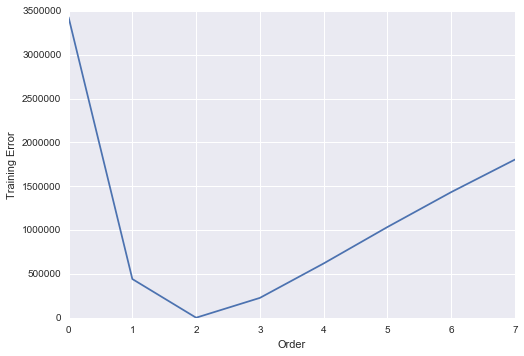

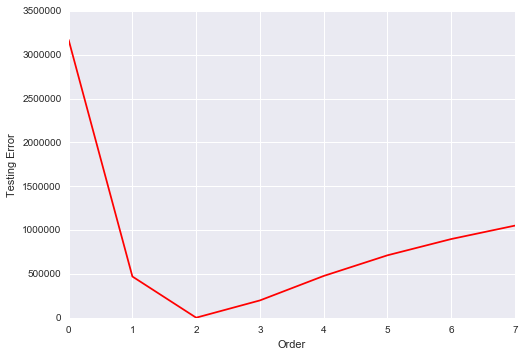

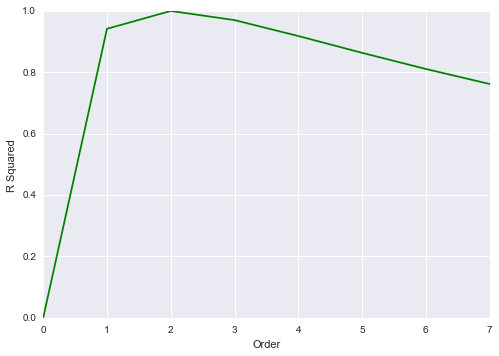

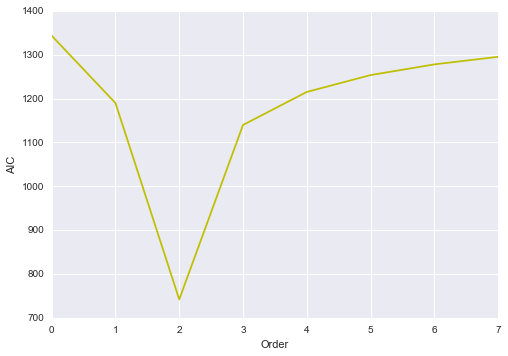

In [34]:
plt.plot(range(8), train_err)
plt.xlabel('Order')
plt.ylabel('Training Error')
plt.show()
plt.plot(range(8), test_err, 'r-')
plt.xlabel('Order')
plt.ylabel('Testing Error')
plt.show()
plt.plot(range(8), r_sqrd, 'g-')
plt.xlabel('Order')
plt.ylabel('R Squared')
plt.show()
plt.plot(range(8), aic, 'y-')
plt.xlabel('Order')
plt.ylabel('AIC')
plt.show()

## Challenge 4

In [98]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

m = []
train_err = []
test_err = []

y, X = dmatrices('y ~ x', data=df, return_type='dataframe')

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

for i in range(1,21):
    
    rows = i*5
    
    m.append(rows)
    
    model = LinearRegression().fit(X_train[:rows], y_train[:rows])

    train_err.append(metrics.mean_squared_error(y_train[:rows], model.predict(X_train[:rows])))
    test_err.append(metrics.mean_squared_error(y_test, model.predict(X_test)))

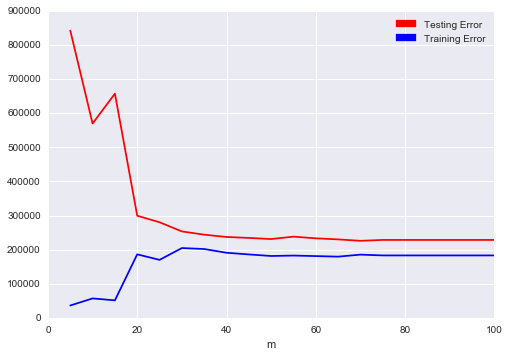

In [101]:
import matplotlib.patches as mpatches

plt.plot(m, train_err, 'b-')
plt.plot(m, test_err, 'r-')

plt.xlabel('m')

blue = mpatches.Patch(color='blue', label='Training Error')
red = mpatches.Patch(color='red', label='Testing Error')
plt.legend(handles=[red, blue])

plt.show()